In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
import seaborn as sns
from scipy import stats
from scipy.stats import norm

In [2]:
df = pd.read_csv('vehicles.csv')
# df

In [3]:
pd.set_option('display.max_columns', 26)


In [4]:
df.set_index('id', inplace=True)

In [5]:
df.drop('Unnamed: 0', axis=1, inplace = True)

In [6]:
df.columns[df.isnull().any()]


Index(['year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'title_status', 'transmission', 'VIN', 'drive', 'size',
       'type', 'paint_color', 'image_url', 'description', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [7]:
# df

#missing values proportion 

In [8]:
miss = df.isnull().sum()/len(df)
miss = miss[miss > 0]
miss.sort_values(inplace=True)
miss


posting_date    0.000061
image_url       0.000061
description     0.000153
year            0.002292
transmission    0.005329
title_status    0.005624
fuel            0.007064
model           0.010576
long            0.016254
lat             0.016254
manufacturer    0.039763
odometer        0.120693
type            0.246038
drive           0.292851
paint_color     0.307375
cylinders       0.373494
VIN             0.409305
condition       0.421071
size            0.701307
dtype: float64

In [9]:
miss_df = pd.DataFrame(miss)
miss_df.reset_index(inplace=True)
miss_df.columns = ['ColumnName', 'Missingprop']
miss_df

,ColumnName,Missingprop
0,posting_date,0.000061
1,image_url,0.000061
2,description,0.000153
3,year,0.002292
4,transmission,0.005329
5,title_status,0.005624
6,fuel,0.007064
7,model,0.010576
8,long,0.016254
9,lat,0.016254


In [10]:
!pip install plotly

In [11]:
df.drop(columns='size', inplace=True)
# df

In [12]:
mean = np.mean(df['price'])
print(mean)
std = np.std(df['price'])
print(std)

40420.93069598637
8194589.661750307


In [13]:
threshold = 8194589
outlier = []
for i in df['price']:
    if i > threshold:
        outlier.append(i)
print(len(outlier))

21


In [14]:
df.drop(df[df['price'] > 8194589].index, inplace=True)
# df

In [15]:
df['region'].unique()

array(['auburn', 'birmingham', 'dothan', 'florence / muscle shoals',
       'gadsden-anniston', 'huntsville / decatur', 'mobile', 'montgomery',
       'tuscaloosa', 'anchorage / mat-su', 'fairbanks', 'kenai peninsula',
       'southeast alaska', 'flagstaff / sedona', 'mohave county',
       'phoenix', 'prescott', 'show low', 'sierra vista', 'tucson',
       'yuma', 'fayetteville', 'fort smith', 'jonesboro', 'little rock',
       'texarkana', 'bakersfield', 'chico', 'fresno / madera',
       'gold country', 'hanford-corcoran', 'humboldt county',
       'imperial county', 'inland empire', 'los angeles',
       'mendocino county', 'merced', 'modesto', 'monterey bay',
       'orange county', 'palm springs', 'redding', 'reno / tahoe',
       'sacramento', 'san diego', 'san luis obispo', 'santa barbara',
       'santa maria', 'SF bay area', 'siskiyou county', 'stockton',
       'susanville', 'ventura county', 'visalia-tulare', 'yuba-sutter',
       'boulder', 'colorado springs', 'denver', 'e

In [16]:
df['condition'].unique()

array(['good', 'excellent', nan, 'like new', 'fair', 'salvage', 'new'],
      dtype=object)

#imputation


In [17]:
df.dropna(subset=['posting_date', 'description', 'model'], inplace=True)
# df

In [18]:
df.drop(columns='VIN', inplace=True)
df.shape

(453308, 22)

In [19]:
df.drop(columns=['url', 'region_url', 'image_url'], inplace=True)
df.shape

(453308, 19)

In [20]:
df.columns[df.isnull().any()]

Index(['year', 'manufacturer', 'condition', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'drive', 'type', 'paint_color', 'lat',
       'long'],
      dtype='object')

In [21]:
df

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,description,state,lat,long,posting_date
id,,,,,,,,,,,,,,,,,,,
7240372487,auburn,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,rwd,other,NaN,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
7240309422,auburn,7500,2014.0,hyundai,sonata,excellent,4 cylinders,gas,93600.0,clean,automatic,fwd,sedan,NaN,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
7240224296,auburn,4900,2006.0,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,clean,automatic,NaN,SUV,blue,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
7240103965,auburn,2000,1974.0,chevrolet,c-10,good,4 cylinders,gas,190000.0,clean,automatic,rwd,pickup,blue,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
7239983776,auburn,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,lien,automatic,4wd,pickup,blue,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7240959076,wausau,14995,2014.0,cadillac,srx,excellent,6 cylinders,gas,83790.0,clean,automatic,4wd,SUV,silver,2014 Cadillac SRX All Wheel Drive Luxury Colle...,wi,44.408867,-89.881210,2020-12-03T08:56:29-0600
7240954682,wausau,17895,2018.0,hyundai,tucson,excellent,4 cylinders,gas,31888.0,clean,automatic,4wd,SUV,white,2018 Hyundai Tucson SE 2.0 I4 AWD. Carfax ver...,wi,44.408867,-89.882240,2020-12-03T08:48:08-0600
7240645700,wyoming,17900,2014.0,cadillac,cts coupe awd,excellent,6 cylinders,gas,53000.0,clean,automatic,4wd,coupe,black,"53,000 miles. Cosmetically, in near mint condi...",wy,44.784900,-106.964800,2020-12-02T14:09:45-0700


In [22]:
miss

posting_date    0.000061
image_url       0.000061
description     0.000153
year            0.002292
transmission    0.005329
title_status    0.005624
fuel            0.007064
model           0.010576
long            0.016254
lat             0.016254
manufacturer    0.039763
odometer        0.120693
type            0.246038
drive           0.292851
paint_color     0.307375
cylinders       0.373494
VIN             0.409305
condition       0.421071
size            0.701307
dtype: float64

In [23]:
df['year'].fillna(method='bfill', inplace=True)
df.columns[df.isnull().any()]

Index(['manufacturer', 'condition', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'drive', 'type', 'paint_color', 'lat',
       'long'],
      dtype='object')

In [24]:
df['long'].fillna(method='bfill', inplace=True)
df['lat'].fillna(method='bfill', inplace=True)

In [25]:
df.columns[df.isnull().any()]

Index(['manufacturer', 'condition', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'drive', 'type', 'paint_color'],
      dtype='object')

In [26]:
odometer_mean = df['odometer'].mean()
df['odometer'].fillna(value=odometer_mean, inplace=True)

In [27]:
df.columns[df.isnull().any()]

Index(['manufacturer', 'condition', 'cylinders', 'fuel', 'title_status',
       'transmission', 'drive', 'type', 'paint_color'],
      dtype='object')

In [28]:
df.dropna(subset=['manufacturer', 'fuel', 'transmission', 'title_status'], inplace=True)

In [29]:
df.columns[df.isnull().any()]

Index(['condition', 'cylinders', 'drive', 'type', 'paint_color'], dtype='object')

In [30]:
df.columns[df.isnull().any()]

Index(['condition', 'cylinders', 'drive', 'type', 'paint_color'], dtype='object')

In [31]:
df['condition'].fillna(method='bfill', inplace=True)

In [32]:
df.columns[df.isnull().any()]

Index(['cylinders', 'drive', 'type', 'paint_color'], dtype='object')

In [33]:
df['type'].fillna(method='bfill', inplace=True)

In [34]:
df['drive'].fillna(method='bfill', inplace=True)
df['paint_color'].fillna(method='bfill', inplace=True)
df['cylinders'].fillna(method='bfill', inplace=True)


##Exploratory data analysis


In [35]:
man_count = df['manufacturer'].value_counts(normalize=True)

In [36]:
man_count

ford               0.181569
chevrolet          0.147482
toyota             0.087917
honda              0.058965
nissan             0.053723
jeep               0.048300
gmc                0.039256
ram                0.038369
dodge              0.038099
bmw                0.028351
hyundai            0.025125
mercedes-benz      0.024325
volkswagen         0.024029
subaru             0.023962
kia                0.020165
chrysler           0.017189
lexus              0.016202
cadillac           0.015396
buick              0.013765
mazda              0.013588
audi               0.012859
acura              0.009124
infiniti           0.008456
lincoln            0.007651
pontiac            0.006959
volvo              0.006426
mini               0.005316
mitsubishi         0.005118
porsche            0.004080
mercury            0.003771
rover              0.003168
saturn             0.003128
tesla              0.002444
jaguar             0.002386
fiat               0.002167
alfa-romeo         0

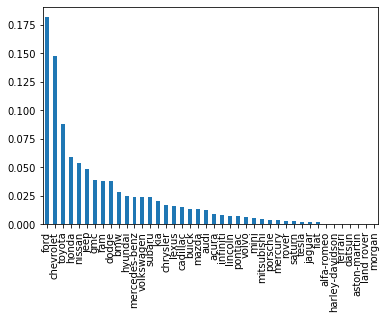

In [37]:
man_count.plot(kind='bar')

In [38]:
manu_by = df.groupby(['manufacturer'])
manu_by.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,description,state,lat,long,posting_date
id,,,,,,,,,,,,,,,,,,,
7240372487,auburn,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,rwd,other,blue,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
7240309422,auburn,7500,2014.0,hyundai,sonata,excellent,4 cylinders,gas,93600.0,clean,automatic,fwd,sedan,blue,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
7240224296,auburn,4900,2006.0,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,clean,automatic,rwd,SUV,blue,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
7240103965,auburn,2000,1974.0,chevrolet,c-10,good,4 cylinders,gas,190000.0,clean,automatic,rwd,pickup,blue,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
7239983776,auburn,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,lien,automatic,4wd,pickup,blue,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7234563718,palm springs,6200,2010.0,aston-martin,martin,like new,other,electric,10.0,clean,other,4wd,convertible,green,Amazing.Beautiful.Like New.Dark Green/Tan Clot...,ca,33.764400,-116.339800,2020-11-20T22:36:06-0800
7236345144,reno / tahoe,6500,2005.0,land rover,lr3,good,8 cylinders,gas,122000.0,rebuilt,automatic,4wd,SUV,green,2005 Land Rover LR3 Have done tons and tons of...,ca,39.135500,-119.758800,2020-11-24T09:21:10-0800
7234803950,ft myers / SW florida,74977,2002.0,morgan,plus 8,excellent,8 cylinders,gas,2379.0,clean,manual,rwd,convertible,silver,2002 *** Morgan Plus 8 *** Ready To Upgrad...,fl,26.138866,-81.768849,2020-11-21T13:31:12-0500


In [39]:
manu_by['model'].value_counts()

manufacturer  model                
acura         mdx                      799
              tl                       596
              tsx                      357
              rdx                      292
              tlx                      166
                                      ... 
volvo         xc90 t6 first edition      1
              xc90 t6 momentum awd       1
              xc90 t6 r-design           1
              xc90 v8 sport awd          1
              xc90t6 momentum awd        1
Name: model, Length: 24681, dtype: int64

In [40]:
manu_by['price'].mean()

manufacturer
acura               10802.682143
alfa-romeo          22564.103261
aston-martin        51337.617647
audi                18933.521810
bmw                 17053.491421
buick                9805.873013
cadillac            17711.182162
chevrolet           16213.121676
chrysler             8710.741503
datsun              12749.327273
dodge               12526.411876
ferrari            140123.118280
fiat                10326.479055
ford                16454.523715
gmc                 20388.724120
harley-davidson     12958.929204
honda                9403.550249
hyundai              8341.733488
infiniti            14048.944674
jaguar              19628.263415
jeep                17343.632903
kia                  9453.475185
land rover          12505.571429
lexus               16036.182876
lincoln             12688.147551
mazda               10017.869476
mercedes-benz       19052.866520
mercury              4542.711111
mini                11543.363835
mitsubishi           9360.0327

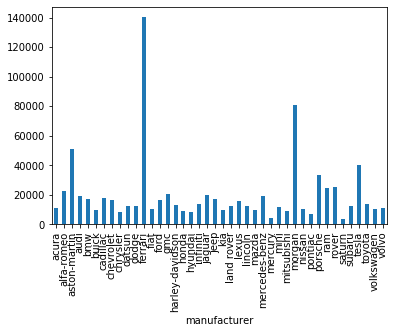

In [41]:
manu_by['price'].mean().plot(kind='bar')

In [42]:
manu_by['price'].mean().min()

3687.856398809524

In [43]:
manu_by['price'].mean().max()

140123.1182795699

In [44]:
df['type'].unique()

array(['other', 'sedan', 'SUV', 'pickup', 'coupe', 'van', 'truck',
       'mini-van', 'wagon', 'convertible', 'hatchback', 'offroad', 'bus'],
      dtype=object)

In [45]:
df['type'].value_counts()

sedan          116566
SUV            101201
pickup          53939
truck           43034
other           28245
coupe           23456
hatchback       20320
wagon           12779
van             12112
convertible      8299
mini-van         8242
offroad           841
bus               611
Name: type, dtype: int64

In [46]:
type_by = df.groupby(['type'])
type_by['price'].mean()

type
SUV            13617.940633
bus            15403.417349
convertible    16240.260995
coupe          17637.463080
hatchback      11029.595276
mini-van        9601.561757
offroad        15676.214031
other          19370.113932
pickup         22364.335916
sedan          10921.967589
truck          18200.117581
van            14208.336030
wagon          11744.900540
Name: price, dtype: float64

In [47]:
type_by['price'].mean()

type
SUV            13617.940633
bus            15403.417349
convertible    16240.260995
coupe          17637.463080
hatchback      11029.595276
mini-van        9601.561757
offroad        15676.214031
other          19370.113932
pickup         22364.335916
sedan          10921.967589
truck          18200.117581
van            14208.336030
wagon          11744.900540
Name: price, dtype: float64

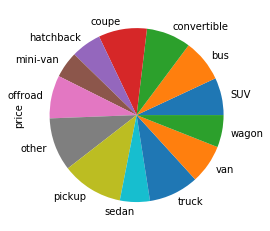

In [48]:
type_by['price'].mean().plot(kind='pie')

In [49]:
manu_model_by = df.groupby(['manufacturer', 'model'])
manu_model_by['price'].mean()

manufacturer  model                 
acura         2.2l                       1200.000000
              2.3cl                      3499.000000
              2015 rdx                  13992.000000
              3.0                        2200.000000
              3.0 cl                     2397.500000
                                            ...     
volvo         xc90 t6 momentum sport    49062.727273
              xc90 t6 r-design              0.000000
              xc90 v8                    4001.000000
              xc90 v8 sport awd          5495.000000
              xc90t6 momentum awd       26700.000000
Name: price, Length: 24681, dtype: float64

In [50]:
df['model'].value_counts()

f-150                 8258
silverado 1500        5893
1500                  4162
camry                 3994
accord                3696
                      ... 
durango crew rwd         1
f150 4x4 platinum        1
navigation limited       1
speed6                   1
vr70 xc                  1
Name: model, Length: 24236, dtype: int64

In [51]:
pd.cut(df['price'], bins=[0,15000,30000,100000,200000,500000,1000000,1400000,2000000,2500000,5000000,7900000]).value_counts()

(0, 15000]            236047
(15000, 30000]        108166
(30000, 100000]        54203
(100000, 200000]         278
(200000, 500000]          48
(1000000, 1400000]        12
(500000, 1000000]          8
(5000000, 7900000]         1
(2500000, 5000000]         1
(2000000, 2500000]         1
(1400000, 2000000]         0
Name: price, dtype: int64

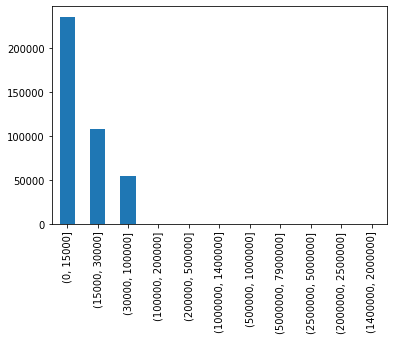

In [52]:
pd.cut(df['price'], bins=[0,15000,30000,100000,200000,500000,1000000,1400000,2000000,2500000,5000000,7900000]).value_counts().plot(kind='bar')

In [53]:
df['condition'].value_counts()


excellent    189233
good         181318
like new      41045
fair          14529
new            2175
salvage        1345
Name: condition, dtype: int64

In [54]:
df


,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,description,state,lat,long,posting_date
id,,,,,,,,,,,,,,,,,,,
7240372487,auburn,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,rwd,other,blue,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
7240309422,auburn,7500,2014.0,hyundai,sonata,excellent,4 cylinders,gas,93600.0,clean,automatic,fwd,sedan,blue,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
7240224296,auburn,4900,2006.0,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,clean,automatic,rwd,SUV,blue,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
7240103965,auburn,2000,1974.0,chevrolet,c-10,good,4 cylinders,gas,190000.0,clean,automatic,rwd,pickup,blue,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
7239983776,auburn,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,lien,automatic,4wd,pickup,blue,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7240964712,wausau,19950,2017.0,audi,a4 premium plus quattro awd,excellent,6 cylinders,gas,101270.0,clean,automatic,4wd,SUV,silver,2017 Audi A4 Premium Plus Quattro AWD ✔ We TA...,wi,44.843195,-91.550371,2020-12-03T09:06:21-0600
7240959076,wausau,14995,2014.0,cadillac,srx,excellent,6 cylinders,gas,83790.0,clean,automatic,4wd,SUV,silver,2014 Cadillac SRX All Wheel Drive Luxury Colle...,wi,44.408867,-89.881210,2020-12-03T08:56:29-0600
7240954682,wausau,17895,2018.0,hyundai,tucson,excellent,4 cylinders,gas,31888.0,clean,automatic,4wd,SUV,white,2018 Hyundai Tucson SE 2.0 I4 AWD. Carfax ver...,wi,44.408867,-89.882240,2020-12-03T08:48:08-0600


In [55]:
df['type'].unique()

array(['other', 'sedan', 'SUV', 'pickup', 'coupe', 'van', 'truck',
       'mini-van', 'wagon', 'convertible', 'hatchback', 'offroad', 'bus'],
      dtype=object)

In [56]:
    df['fuel'].value_counts()

gas         381119
diesel       25574
other        15104
hybrid        5655
electric      2193
Name: fuel, dtype: int64

In [57]:
df['condition'].unique()

array(['good', 'excellent', 'like new', 'fair', 'salvage', 'new'],
      dtype=object)

In [58]:
df.columns[df.isnull().any()]

Index([], dtype='object')

In [59]:
# cond_dict = {'new':6, 'like new':5, 'excellent':4, 'good':3, 'fair':2, 'salvage':1}
# df['condition'].map(cond_dict).astype(int)

In [60]:
# fuel_dict = {'electric':5, 'hybrid':4, 'other':3, 'petrol':2, 'diesel':1}
# df['fuel'].map(fuel_dict).astype(int)

In [61]:
df['title_status'].unique()

array(['clean', 'lien', 'missing', 'salvage', 'rebuilt', 'parts only'],
      dtype=object)

In [62]:
df['title_status'].value_counts()

clean         414761
rebuilt         8281
salvage         3957
lien            1976
missing          528
parts only       142
Name: title_status, dtype: int64

In [63]:
title_dict = {'clean':6, 'rebuilt':5,'salvage':4, 'lien':3, 'parts only':2, 'missing':1}
df['title_status'].map(title_dict).astype(int)


id
7240372487    6
7240309422    6
7240224296    6
7240103965    6
7239983776    3
             ..
7240964712    6
7240959076    6
7240954682    6
7240645700    6
7240600465    6
Name: title_status, Length: 429645, dtype: int32

In [64]:
df['title_status'].replace('clean', 6, inplace=True)
df['title_status'].replace('rebuilt', 5, inplace=True)
df['title_status'].replace('salvage', 4, inplace=True)
df['title_status'].replace('lien', 3, inplace=True)
df['title_status'].replace('parts', 2, inplace=True)
df['title_status'].replace('missing', 1, inplace=True)

In [65]:
df['condition'].unique()

array(['good', 'excellent', 'like new', 'fair', 'salvage', 'new'],
      dtype=object)

In [66]:
df['condition'].replace('new', 6, inplace=True)
df['condition'].replace('like new', 5, inplace=True)
df['condition'].replace('excellent', 4, inplace=True)
df['condition'].replace('good', 3, inplace=True)
df['condition'].replace('fair', 2, inplace=True)
df['condition'].replace('salvage', 1, inplace=True)


In [67]:
df['fuel'].replace('electric', 5, inplace=True)
df['fuel'].replace('hybrid', 4, inplace=True)
df['fuel'].replace('other', 3, inplace=True)
df['fuel'].replace('gas', 2, inplace=True)
df['fuel'].replace('diesel', 1, inplace=True)

In [68]:
df['cylinders'].unique()

array(['8 cylinders', '4 cylinders', '6 cylinders', '10 cylinders',
       '5 cylinders', '3 cylinders', 'other', '12 cylinders'],
      dtype=object)

In [69]:
df['cylinders'].replace('12 cylinders', 12, inplace=True)
df['cylinders'].replace('10 cylinders', 10, inplace=True)
df['cylinders'].replace('8 cylinders', 8, inplace=True)
df['cylinders'].replace('6 cylinders', 6, inplace=True)
df['cylinders'].replace('5 cylinders', 5, inplace=True)
df['cylinders'].replace('4 cylinders', 4, inplace=True)
df['cylinders'].replace('3 cylinders', 3, inplace=True)
df['cylinders'].replace('other', 1, inplace=True)

In [70]:
df['transmission'].unique()

array(['other', 'automatic', 'manual'], dtype=object)

In [71]:
df['transmission'].replace('automatic', 3, inplace=True)
df['transmission'].replace('manual', 2, inplace=True)
df['transmission'].replace('other', 1, inplace=True)

In [72]:
df['drive'].unique()
df['drive'].value_counts()

4wd    185955
fwd    163601
rwd     80089
Name: drive, dtype: int64

In [73]:
df['drive'].replace('4wd', 3, inplace=True)
df['drive'].replace('rwd', 2, inplace=True)
df['drive'].replace('fwd', 1, inplace=True)

In [74]:
df['type'].unique()

array(['other', 'sedan', 'SUV', 'pickup', 'coupe', 'van', 'truck',
       'mini-van', 'wagon', 'convertible', 'hatchback', 'offroad', 'bus'],
      dtype=object)

In [75]:
df['type'].replace('bus', 13, inplace=True)
df['type'].replace('truck', 12, inplace=True)
df['type'].replace('coupe', 11, inplace=True)
df['type'].replace('convertible', 10, inplace=True)
df['type'].replace('SUV', 9, inplace=True)
df['type'].replace('offroad', 8, inplace=True)
df['type'].replace('van', 7, inplace=True)
df['type'].replace('mini-van', 6, inplace=True)
df['type'].replace('wagon', 5, inplace=True)
df['type'].replace('pickup', 4, inplace=True)
df['type'].replace('sedan', 3, inplace=True)
df['type'].replace('hatchback', 2, inplace=True)
df['type'].replace('other', 1, inplace=True)

In [76]:
df['paint_color'].unique()

array(['blue', 'red', 'silver', 'black', 'white', 'grey', 'orange',
       'green', 'yellow', 'custom', 'brown', 'purple'], dtype=object)

In [77]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['paint_color']= label_encoder.fit_transform(df['paint_color'])

In [78]:
df['posting_date'].dtypes

dtype('O')

In [79]:
df['region'].unique()

array(['auburn', 'birmingham', 'dothan', 'florence / muscle shoals',
       'gadsden-anniston', 'huntsville / decatur', 'mobile', 'montgomery',
       'tuscaloosa', 'anchorage / mat-su', 'fairbanks', 'kenai peninsula',
       'southeast alaska', 'flagstaff / sedona', 'mohave county',
       'phoenix', 'prescott', 'show low', 'sierra vista', 'tucson',
       'yuma', 'fayetteville', 'fort smith', 'jonesboro', 'little rock',
       'texarkana', 'bakersfield', 'chico', 'fresno / madera',
       'gold country', 'hanford-corcoran', 'humboldt county',
       'imperial county', 'inland empire', 'los angeles',
       'mendocino county', 'merced', 'modesto', 'monterey bay',
       'orange county', 'palm springs', 'redding', 'reno / tahoe',
       'sacramento', 'san diego', 'san luis obispo', 'santa barbara',
       'santa maria', 'SF bay area', 'siskiyou county', 'stockton',
       'susanville', 'ventura county', 'visalia-tulare', 'yuba-sutter',
       'boulder', 'colorado springs', 'denver', 'e

In [80]:
df

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,description,state,lat,long,posting_date
id,,,,,,,,,,,,,,,,,,,
7240372487,auburn,35990,2010.0,chevrolet,corvette grand sport,3,8,2,32742.0,6,1,2,1,1,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
7240309422,auburn,7500,2014.0,hyundai,sonata,4,4,2,93600.0,6,3,1,3,1,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
7240224296,auburn,4900,2006.0,bmw,x3 3.0i,3,6,2,87046.0,6,3,2,9,1,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
7240103965,auburn,2000,1974.0,chevrolet,c-10,3,4,2,190000.0,6,3,2,4,1,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
7239983776,auburn,19500,2005.0,ford,f350 lariat,4,8,1,116000.0,3,3,3,4,1,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7240964712,wausau,19950,2017.0,audi,a4 premium plus quattro awd,4,6,2,101270.0,6,3,3,9,9,2017 Audi A4 Premium Plus Quattro AWD ✔ We TA...,wi,44.843195,-91.550371,2020-12-03T09:06:21-0600
7240959076,wausau,14995,2014.0,cadillac,srx,4,6,2,83790.0,6,3,3,9,9,2014 Cadillac SRX All Wheel Drive Luxury Colle...,wi,44.408867,-89.881210,2020-12-03T08:56:29-0600
7240954682,wausau,17895,2018.0,hyundai,tucson,4,4,2,31888.0,6,3,3,9,10,2018 Hyundai Tucson SE 2.0 I4 AWD. Carfax ver...,wi,44.408867,-89.882240,2020-12-03T08:48:08-0600


In [81]:
numeric_data = df.select_dtypes(include=[np.number])
numeric_data


,price,year,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,lat,long
id,,,,,,,,,,,,
7240372487,35990,2010.0,3,8,2,32742.0,1,2,1,1,32.590000,-85.480000
7240309422,7500,2014.0,4,4,2,93600.0,3,1,3,1,32.547500,-85.468200
7240224296,4900,2006.0,3,6,2,87046.0,3,2,9,1,32.616807,-85.464149
7240103965,2000,1974.0,3,4,2,190000.0,3,2,4,1,32.861600,-85.216100
7239983776,19500,2005.0,4,8,1,116000.0,3,3,4,1,32.547500,-85.468200
...,...,...,...,...,...,...,...,...,...,...,...,...
7240964712,19950,2017.0,4,6,2,101270.0,3,3,9,9,44.843195,-91.550371
7240959076,14995,2014.0,4,6,2,83790.0,3,3,9,9,44.408867,-89.881210
7240954682,17895,2018.0,4,4,2,31888.0,3,3,9,10,44.408867,-89.882240


In [82]:
x = numeric_data[['condition', 'cylinders', 'fuel', 'odometer', 'transmission', 'drive', 'type', 'paint_color', 'lat', 'long']]
x_new = x[0:100000]
x_new

,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,lat,long
id,,,,,,,,,,
7240372487,3,8,2,32742.0,1,2,1,1,32.590000,-85.480000
7240309422,4,4,2,93600.0,3,1,3,1,32.547500,-85.468200
7240224296,3,6,2,87046.0,3,2,9,1,32.616807,-85.464149
7240103965,3,4,2,190000.0,3,2,4,1,32.861600,-85.216100
7239983776,4,8,1,116000.0,3,3,4,1,32.547500,-85.468200
...,...,...,...,...,...,...,...,...,...,...
7240650783,5,4,2,118954.0,3,1,5,9,25.869874,-80.242697
7240649066,5,4,2,19283.0,3,1,3,5,25.989400,-80.215300
7240647763,5,6,2,119000.0,3,3,3,10,25.985000,-80.140700


In [83]:
y = numeric_data['price']
y_new = y[0:100000]
y_new

id
7240372487    35990
7240309422     7500
7240224296     4900
7240103965     2000
7239983776    19500
              ...  
7240650783     5900
7240649066    13375
7240647763    18499
7240647054     5500
7240642004      350
Name: price, Length: 100000, dtype: int64

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_new, y_new, test_size=0.2, random_state=5)


In [85]:
Y_test

id
7227237023     7200
7239367869    24988
7237907641     4000
7239950343     4995
7235041245     6200
              ...  
7240624104    16995
7233487944    26590
7236646852     9500
7237130589    41857
7240183457     9550
Name: price, Length: 20000, dtype: int64

In [86]:
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 200, random_state = 0)
regressor.fit(X_train, Y_train)
y_pred = regressor.predict(X_test)

In [87]:
y_pred

array([16229.82285714, 22605.73666667,  6062.19      , ...,
       10959.015     , 27736.75      , 11404.49458333])

In [88]:
y_df = pd.DataFrame([y_pred,Y_test])
y_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,...,19987,19988,19989,19990,19991,19992,19993,19994,19995,19996,19997,19998,19999
0,16229.822857,22605.736667,6062.19,6763.25,8898.9,9619.36,19542.31,24299.39,29988.0,24542.675,17266.1,11622.86,16281.94,...,8312.57,4969.039167,13085.7,123847.3,15775.49,39995.04,12570.695,19261.24,23142.2,21777.085,10959.015,27736.75,11404.494583
1,7200.000000,24988.000000,4000.00,4995.00,6200.0,6500.00,19985.00,27998.00,29990.0,26990.000,0.0,2995.00,0.00,...,5500.00,2350.000000,11990.0,38591.0,13990.00,40995.00,15482.000,19995.00,16995.0,26590.000,9500.000,41857.00,9550.000000


In [89]:
from sklearn import metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))


Root Mean Squared Error: 8622.443990944059
